# Example notebook - Getting started with custom layer

Below is an example of a notebook running on the data from https://www.kaggle.com/alexattia/the-simpsons-characters-dataset. The notebook assumes that one has extracted all relevant data from Kaggle to the 'data' folder (which should be placed on the same level in the hierarchy as the 'notebooks' folder). 

The code below is almost an exact copy of a Kernel written by paultimothymooney, which can be found here: https://www.kaggle.com/paultimothymooney/simpsons-recognition-method-comparison.

The idea is that this code should serve as a starting ground, and a frame of reference, for our further development during the project. The ultimate performance of the model below is around 60%, which is ideal for us because it leaves plenty of room for improvement. 

During the course of the project we will implement a network that uses Differentiable Plasticity. We will use the notebook here below as a reference point, i.e. we will examine how much performance gain can be achieved by adding DP to the network. 

##### TODO: Can clean redundant imports from the list below

In [8]:
from PIL import Image, ImageFilter, ImageStat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy
import PIL
import os
import itertools
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import sklearn
from sklearn.metrics import confusion_matrix
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
import keras
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D, Activation
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, Callback, EarlyStopping
from keras.engine.topology import Layer
import keras.legacy.interfaces as interfaces

train_path = '../data/simpsons_dataset/simpsons_dataset'
test_path = '../data/kaggle_simpson_testset/kaggle_simpson_testset'

In [ ]:
class Hebb(Layer):
 
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(MyLayer, self).__init__(**kwargs)
 
    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[1], self.output_dim),
                                      initializer='zeros',
                                      trainable=True)
        # TODO create the alpha matrix, not sure about params
        self.alpha = self.add_weight(name='alpha',
                                      shape=(input_shape, self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        # TODO create the ETA, hebbian learning rate, not sure about params
        # TODO initializer (starts at .01 in their implementation)
        self.eta = self.add_weight(name='eta',
                                      shape=(1),
                                      initializer='uniform',
                                      trainable=True)
        super(MyLayer, self).build(input_shape)  # Be sure to call this at the end
 
    def call(self, x):
        # TODO [Hebbian](https://github.com/uber-common/differentiable-plasticity/blob/master/simple/simple.py#L119)
        # TODO further alterations?
        res = K.maximum(0, x)
        
        self.hebb = etc~
        return res
    return y
 
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)
 
 

In [81]:

''' Extension of Keras' Conv2d layer. '''
''' TODO: Implementd DP here '''
class customConv(keras.layers.Convolution2D):
    
    @interfaces.legacy_conv2d_support
    def __init__(self, filters, kernel_size,
                 strides=(1, 1),
                 padding='valid',
                 data_format=None,
                 dilation_rate=(1, 1),
                 activation=None,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 **kwargs): 
        
        super(customConv, self).__init__(filters, 
                 kernel_size,
                 strides=strides,
                 padding=padding,
                 data_format=data_format,
                 dilation_rate=dilation_rate,
                 activation=activation,
                 use_bias=use_bias,
                 kernel_initializer=kernel_initializer,
                 bias_initializer=bias_initializer,
                 kernel_regularizer=kernel_regularizer,
                 bias_regularizer=bias_regularizer,
                 activity_regularizer=activity_regularizer,
                 kernel_constraint=kernel_constraint,
                 bias_constraint=bias_constraint,
                 **kwargs)
        
    
    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        '''
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        '''
        
        ''' The Hebbian trace is initialized to zero 
            at the beginning of each lifetime/episode: 
            it is purely a lifetime quantity. 
            
            TODO: Does this mean we have to set it to 
            zero at the start of every Epoch? If so we
            can probably do it via callback :
            https://keunwoochoi.wordpress.com/2016/07/16/keras-callbacks/ 
        '''                
        self.hebbian = self.add_weight(name='hebbian', 
                                      shape=(np.shape(super().kernel)),
                                      initializer='zeros',
                                      trainable=True)
        print("building")
        
        super(customConv, self).build(input_shape)
    
    def call(self, x):
        print("calling")        
        self.hebbian = np.add(self.hebbian, 1)
        output = super(customConv, self).call(x)
        return output
    


In [56]:

'''  A convenient place for us to put all of our callbacks. 
     Currently we only use the on_epoch_end, but some of 
     other callbacks might prove useful later '''
class CustomCallbacks(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        #self.aucs = []
        #self.losses = []
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        #self.losses.append(logs.get('loss'))
        #y_pred = self.model.predict(self.validation_data[0])
        #self.aucs.append(roc_auc_score(self.validation_data[1], y_pred))
        
        for layer in self.model.layers:
            if isinstance(layer, customConv):
                print(layer.hebbian)
                layer.hebbian.fill(0)
                print(layer.hebbian)
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

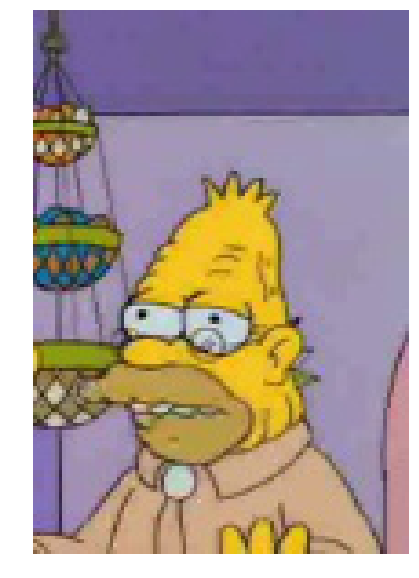

In [31]:
#TODO : Delete cell? 

image_name = test_path + "/abraham_grampa_simpson_0.jpg" #Image to be used as query
def plotLisa(image_location):
    image = cv2.imread(image_name)
    #image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotLisa(image_name)

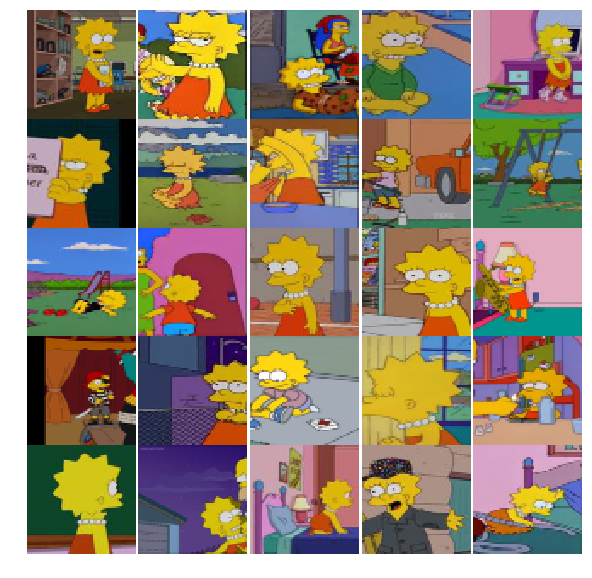

In [32]:
#TODO : Delete cell? 

simpsons = glob.glob(train_path + '/lisa_simpson/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in simpsons[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (64, 64)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [20]:

dict_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lenny_leonard', 11:'lisa_simpson',
        12: 'marge_simpson', 13: 'mayor_quimby',14:'milhouse_van_houten', 15: 'moe_szyslak', 
        16: 'ned_flanders', 17: 'nelson_muntz', 18: 'principal_skinner', 19: 'sideshow_bob'}
def load_test_set(dirname,dict_characters):
    X_test = []
    Y_test = []
    for image_name in os.listdir(dirname):
        character_name = "_".join(image_name.split('_')[:-1])
        #print(character_name)
        label = [label for label,character in dict_characters.items() if character == character_name][0]
        image = scipy.misc.imread(dirname+'/'+image_name)
        X_test.append(scipy.misc.imresize(image,(64,64),interp='lanczos'))
        Y_test.append(label)
    return np.array(X_test), np.array(Y_test)
X_test, Y_test = load_test_set(test_path, dict_characters)
# I will begin by working with the testing dataset only. Later I will load the training dataset as well.
X = X_test
y = Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
# Reduce Sample Size for DeBugging
X_train = X_train[0:1000] 
Y_train = Y_train[0:1000]
X_test = X_test[0:1000] 
Y_test = Y_test[0:1000]
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)
# Make Data 1D for compatability with standard classifiers
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)
# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_trainHot = to_categorical(Y_train, num_classes = 20)
Y_testHot = to_categorical(Y_test, num_classes = 20)

c:\users\bjarn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
c:\users\bjarn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  from ipykernel import kernelapp as app


Training Data Shape: (792, 64, 64, 3) (792, 64, 64, 3)
Testing Data Shape: (198, 64, 64, 3) (198, 64, 64, 3)


In [64]:
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# class MetricsCheckpoint(Callback):
#     """Callback that saves metrics after each epoch"""
#     def __init__(self, savepath):
#         super(MetricsCheckpoint, self).__init__()
#         self.savepath = savepath
#         self.history = {}
#     def on_epoch_end(self, epoch, logs=None):
#         for k, v in logs.items():
#             self.history.setdefault(k, []).append(v)
#         np.save(self.savepath, self.history)

# def plotKerasLearningCurve():
#     plt.figure(figsize=(10,5))
#     metrics = np.load('logs.npy')[()]
#     filt = ['acc'] # try to add 'loss' to see the loss learning curve
#     for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
#         l = np.array(metrics[k])
#         plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
#         x = np.argmin(l) if 'loss' in k else np.argmax(l)
#         y = l[x]
#         plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
#         plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
#     plt.legend(loc=4)
#     plt.axis([0, None, None, None]);
#     plt.grid()
#     plt.xlabel('Number of epochs')

In [22]:
img_size = 64
from os import listdir
directory_name = train_path

def load_train_set(dirname,dict_characters):
   X_train = []
   Y_train = []
   for label,character in dict_characters.items():
       list_images = os.listdir(dirname+'/'+character)
       for image_name in list_images[0:150]:
           image = scipy.misc.imread(dirname+'/'+character+'/'+image_name)
           X_train.append(scipy.misc.imresize(image,(img_size,img_size),interp='lanczos'))
           Y_train.append(label)
   return np.array(X_train), np.array(Y_train)
X_train, Y_train = load_train_set(train_path, dict_characters)       
# Normalize the data
X_train = X_train / 255.0
print("Train", X_train.shape, Y_train.shape)

c:\users\bjarn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
c:\users\bjarn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


Train (3000, 64, 64, 3) (3000,)


In [23]:
# Split data for cross validation
X_test, Y_test = load_test_set(test_path, dict_characters) 
X_train, Y_train = load_train_set(train_path, dict_characters)       
# Reduce Sample Size for DeBugging 
X_train = X_train[0:3000] 
Y_train = Y_train[0:3000]
X_test = X_test[0:1000] 
Y_test = Y_test[0:1000]
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)
# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 20)
Y_test = to_categorical(Y_test, num_classes = 20)

c:\users\bjarn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
c:\users\bjarn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  from ipykernel import kernelapp as app
c:\users\bjarn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
c:\users\bjarn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` 

Training Data Shape: (3000, 64, 64, 3) (3000, 64, 64, 3)
Testing Data Shape: (990, 64, 64, 3) (990, 64, 64, 3)


Epoch 1/16
94/93 [==============================] - 29s 307ms/step - loss: 2.9978 - acc: 0.0503
Epoch 2/16
94/93 [==============================] - 21s 221ms/step - loss: 2.9688 - acc: 0.0759
Epoch 3/16
94/93 [==============================] - 20s 217ms/step - loss: 2.8844 - acc: 0.1302
Epoch 4/16
94/93 [==============================] - 20s 213ms/step - loss: 2.8003 - acc: 0.1477
Epoch 5/16
94/93 [==============================] - 20s 214ms/step - loss: 2.7366 - acc: 0.1593
Epoch 6/16
94/93 [==============================] - 20s 216ms/step - loss: 2.6463 - acc: 0.1947
Epoch 7/16
94/93 [==============================] - 20s 212ms/step - loss: 2.5699 - acc: 0.2135
Epoch 8/16
94/93 [==============================] - 20s 212ms/step - loss: 2.4463 - acc: 0.2744
Epoch 9/16
94/93 [==============================] - 20s 212ms/step - loss: 2.2484 - acc: 0.3204
Epoch 10/16
94/93 [==============================] - 20s 212ms/step - loss: 2.0772 - acc: 0.3752
Epoch 11/16
94/93 [====================

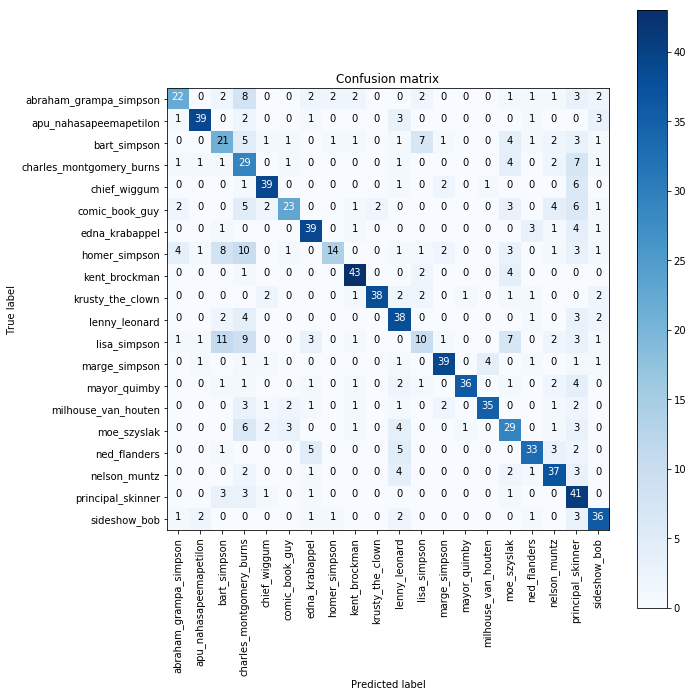

In [83]:
customCallbacks = CustomCallbacks()

def kerasAugmentation(a,b,c,d):
    img_rows, img_cols = img_size,img_size
    input_shape = (img_rows, img_cols, 3)
    batch_size = 128
    num_classes = 20
    epochs = 16
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(256, (3, 3), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
    datagen.fit(a)
    model.fit_generator(datagen.flow(a,b, batch_size=32),
                        steps_per_epoch=len(a) / 32, epochs=epochs, callbacks=[customCallbacks])
    score = model.evaluate(c,d, verbose=0)
    print('\nKeras CNN #3B - accuracy:', score[1])
    print('')
    y_pred = model.predict(c)
    #print("foo")
    #print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='') 
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(d,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values()))  
kerasAugmentation(X_train, Y_train, X_test, Y_test)